## 0. Unit conversion (*)
- Create a class for converting US units to the metric system. It should have the following bound methods:
    - __init__ (self, value)
    - inch_to_cm(self)
    - foot_to_meters(self)
    - pound_to_kg(self)
    - __repr__(self)

In [12]:
class Units:
    def __init__(self, value):
        self.value = value

    @property
    def value(self):
        return self._value
    
    @value.setter
    def value(self,val):
        if not isinstance(val, (int, float)):
            raise TypeError("Value must be a number")
        if val < 0:
            raise ValueError("Value must be positive")
        self._value = val
    
    def inch_to_cm(self):
        return self.value * 2.54 #cm
    

    def foot_to_meters(self):
        return self.value * 0.3048 #m
       

    def pound_to_kg(self):
        return self.value* 0.45392 #kg

    def __repr__(self):
        return f"{self._value}"

try:
    v1 = Units(2)
    v1
except RecursionError:
    print("There was a Recursion error")

v1.inch_to_cm()
v1.foot_to_meters()




0.6096

## 1. Person (*)
Create a class named Person, with parameterized constructor with the following parameters:

name
age
email
Turn name, age, email into properties with following validations in their setters:

name - must be string
age - must be number between 0 and 125
email - must include an @ sign
It should also have __repr__ method to represent the Person class in a neat way.

Also create a method say_hello() that prints

In [1]:
class Person:
    # the contructor (initialiseringsmetoden) that runs when a new 'Person'-object is created
    # ex p1 = Person(....)
    def __init__(self, name: str, age: int, email: str):

        # Detta tilldelar värdena som skickas in (tex. "Sven", 55 ...)
        # till objektets egenskaper (name, age, email) men,
        # eftsersom jag definerat 'getter' och 'setter' för dessa egenskaper så kommer
        # tilldelningengå via setter-metoderna - vilket innebär att validering osv sker.
        self.name = name
        self.age = age
        self.email = email

    # Detta definerar hur objektet ska representeras som sträng när du tex skriver 'print(p1)' eller
    # om man inspekterar det i en interpreter
    def __repr__(self):
        # Bygger och retunerar en sträng med name, ålder och e-post. 
        # Eftersom 'self.name' osv är "publica" egenskaper som via 'properties' får värden,
        # kommer dessa att avspegla de interna "_name" "_age" "_email" som jag sätter. 
        return f"{self.name} {self.age}, {self.email} "

    # "egenskaper" - här sker validering och kontroller
    @property
    # property ovanför 'def name(self) gör att 'name' fungerar som en egenskap,
    # alltså att man kan skriva 'person.name' för att läsa värdet, utan att behöva kalla på en metod som "get_name()"
    # Detta är getter-delen, när man skriver 'person.name' körs denna metod och reunerar 'self._name'
    def name(self):
        # Lagrar det i en "privat" variabel. 
        return self._name
    
    @name.setter
    # Innebär att om man skriver tex 'person.name = blabla' så körs denna metod,
    # det är 'setter'-delen för 'name'
    def name(self, nam):
        if not isinstance(nam, str):
            raise ValueError("The name must be a string")
        # om kontrollen ovan klarar sig så sparas värdet i den "privata" variablen _name
        self._name = nam 
    
    @property
    def age(self):
        return self._age
    
    @age.setter
    def age(self, ag):
        if not isinstance(ag, int):
            raise ValueError("The name must be a number")
        # Om 'ag' INTE är större eller lika med 0, mindre eller lika med 125 så...
        if not (0 <= ag <= 125): 
            raise ValueError("The nnumber must be between 0 and 125")
        self._age = ag 

    @property
    def email(self):
        return self._email
    
    @email.setter
    def email(self, em):
        if not isinstance(em, str):
            raise ValueError("The email name must be a string")
        # Om '@' INTE finns i 'em'...
        if not "@" in em:
            raise ValueError("The email must include a '@' ")
        self._email = em

    def say_hello(self) -> None:
        print(f"Hi, my name is {self.name}, I am {self.age} years old, my email adress is: {self.email}")
        
# Här skapas p1 genom att anropa metoden 'Person(...)'. Då körs __init__. 
# Inuti 'init' sker self.name = "Sven" osv. Varje tilldelning går genom respektive
# 'setter' och valideras. Om något värde inte skulle klara kontrollerna skulle ett fel kastas
# och objektet inte skapas korrekt. 

#print(p1) — då används __repr__, och du ser något som t.ex. Sven 55, SvenSvensson@hotmail.com.
p1 = Person("Sven", 55, "SvenSvensson@hotmail.com")
p1.email
p1.name
p1.age
p1.say_hello()


Hi, my name is Sven, I am 55 years old, my email adress is: SvenSvensson@hotmail.com


In [8]:
p3 = Person("Micke", 60, "MickeMartis@gmail.com")
p3.say_hello()

Hi, my name is Micke, I am 60 years old, my email adress is: MickeMartis@gmail.com


Sammanfattning: vad gör vad?

Klassen Person definierar vilka egenskaper ett “person-objekt” har (namn, ålder, e-post) och vilket beteende (representation + validering).

__init__ — ställer in initiala värden och använder egenskaperna (så validering sker direkt).

@property (getter) — gör att du kan läsa egenskaper som vanliga attribut (person.name) men bakom kulisserna körs en metod (t.ex. def name(self)) vilket ger dig möjligheten att styra / logga / räkna ut etc. 
Real Python
+1

@<property>.setter (setter) — gör att du kan skriva till attributet som vanligt (person.name = "Anna") men i själva verket körs en metod där du kan validera eller modifiera värdet innan du sparar det.

Intern lagring i _name, _age, _email — denna “bakgrundsvariabel” används för att undvika oavsiktlig direkt ändring och för att separera “offentlig” egenskap från intern representation.

Validering — du ser att innan värden sparas görs kontroller (typkontroll, intervallet för ålder, “@” i e-post) för att säkerställa objektets tillstånd är “sant” (giltigt) och siså.

In [2]:
s = "hej"
"@" in s

False

## 2. Student and Teacher (*)

Create two classes named Student and Teacher that inherits from Person.

In [20]:
#Student class that inheritence from class Person
class Student(Person):
    def __init__(self, name, age, email) -> None:
        #super() what it gets from 'Person'
        super().__init__(name, age, email)

    #study method()
    def study(self) -> str:
        print("study... study...study...more study")

    #overwrite say_hello method()
    def say_hello(self) -> None:
        print(f"Yo, I am a student, my name is {self.name}, I am {self.age} years old, my email adress is: {self.email} ")


# Teacher class that inheritens from Person


class Teacher(Person):
    def __init__(self, name, age, email) -> None:
          super().__init__(name, age, email)

    def teach(self) -> None:
        print("teach...teach..teach...more teaching")

stud1 = Student("Fredrik", 36, "Fredrik_Fredriksson@hotmail.com")

teach1 = Teacher("Lisa", 33, "Lisa.ÄrBäst@hotmail.com")

stud1.say_hello()
teach1.say_hello()
stud1.study()
teach1.teach()

Yo, I am a student, my name is Fredrik, I am 36 years old, my email adress is: Fredrik_Fredriksson@hotmail.com 
Hi, my name is Lisa, I am 33 years old, my email adress is: Lisa.ÄrBäst@hotmail.com
study... study...study...more study
teach...teach..teach...more teaching


## 4. Video(*)

In [13]:
#importerar re för att hitta mönster
import re 

class Video:
    def __init__(self, title: str, genre: str, rating: float) -> None:
        self.title = title
        self.genre = genre
        self.rating = rating

    def __repr__(self) -> None:
        return f"{self.title} {self.genre}, {self.rating}"
    
    def __str__(self):
        print(f"The title: {self.title} is of type: {self.genre} genre, and has therating: {self.rating}")
        
    def info(self) -> None:
        print(f"This video: {self.title} is of the genre {self.genre} and has a rating of {self.rating}")

    @property
    def title(self) -> str:
        return self._title
    
    @title.setter
    def title(self, value: str) -> None:
        if re.search(r"^[A-ö]+(\s[A-ö]+)?$", value.strip()) is None:
            raise ValueError("The value {value} is not a valid title")

        self._title = value

    @property
    def genre(self) -> str:
        return self._genre
    
    @genre.setter
    def genre(self, gen: str) -> None:
        if re.search(r"^[A-ö]+(\s[A-ö]+)?$", gen.strip()) is None:
            raise ValueError(" The genre {gen} doesnt exists")

        self._genre = gen

    @property
    def rating(self) -> float:
        return self._rating
    
    @rating.setter
    def rating(self, rat: float | int) -> None:
        if not (0 <= rat < 6):
            raise ValueError(" The rating must be between 0-5, not {rat}, try again!")

        self._rating = rat
        
#v1 = Video("Modern Family", "teens", 4.8)
#v1.title


class TVSerie(Video):
    def __init__(self, title: str, genre: str, rating: float, num_episodes: int) -> None:
        super().__init__(title, genre, rating)
        self.num_episodes = num_episodes

    def info(self) -> None:
        print(f"This TVSerie with title: {self.title} is of the genre {self.genre}, has {self.num_episodes} episodes, and has a rating of {self.rating}")
        
class Movie(Video):
    def __init__(self, title: str, genre: str, rating: float, duration: float) -> None:
        super().__init__(title, genre, rating)
        self.duration = duration

    def info(self):
        print(f"Movie with title: {self.title} is of genre: {self.genre} has rating of: {self.rating} and duration of: {self.duration} minutes.")

class Documentary(Video):
    def __init__(self, title: str, genre: str, rating: float) -> None:
        super().__init__(title, genre, rating)

    def info(self):
        print(f" This documentary with title: {self.title} is of genre: {self.genre} and has the rating of: {self.rating}")
        
pokemon = TVSerie("Pokemon", "Cartoon", 4.5, 550)
titanic = Movie("Titanic", "Romance", 4.7, 194)
code = Documentary("The Code", "Math", 4)

for video in tuple((pokemon, titanic, code)):
    print(video.info())



    


This TVSerie with title: Pokemon is of the genre Cartoon, has 550 episodes, and has a rating of 4.5
None
Movie with title: Titanic is of genre: Romance has rating of: 4.7 and duration of: 194 minutes.
None
 This documentary with title: The Code is of genre: Math and has the rating of: 4
None


## 3. Plotting library (**)

first we do the code

x[:5] = array([0.       , 0.1010101, 0.2020202, 0.3030303, 0.4040404])
x.shape = (100,)


Text(9, 10, 'Big dip here')

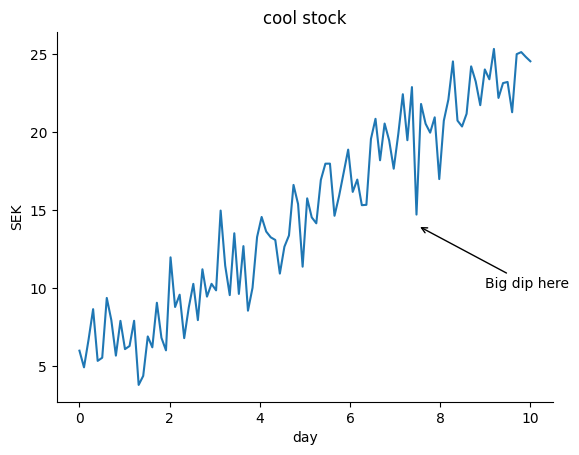

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

    
        
np.random.seed(42)
x = np.linspace(0, 10, 100)
y = 2 * x + 5 + np.random.normal(0, 2, size=len(x))

#print(x)
#print(y)

# slising
print(f"{x[:5] = }")
# check the shape
print(f"{x.shape = }")

# can plot in several windows
fig, ax = plt.subplots(1) # plt.figure(), plt.axes()

ax.plot(x,y)
ax.set(title = "cool stock", xlabel = "day", ylabel = "SEK")
ax.spines[["top", "right"]].set_visible(False)
# the arrow
ax.annotate("Big dip here", xytext = (9,10), xy = (7.5,14), arrowprops = {"arrowstyle": "->"})

#annotate = AnnotatePlot(fig, ax)
#annotate.arrow("Big dip here", (8, 10), (7.5, 14.8))

## Refactor into a class

then we create the class

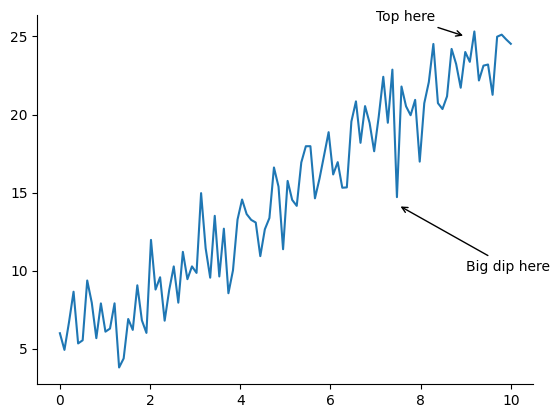

In [ ]:
class PlotAnnotator:
    def __init__(self, fig, ax):
        self.fig = fig
        self.ax = ax

    def arrow(self, label: str, start_xy: tuple[float], end_xy: tuple[float]):
        self.ax.annotate(
            label,
            xytext = start_xy, 
            xy=end_xy,
            arrowprops = {"arrowstyle": "->"},
                        )
        
        return self
        
    def remove_clutter(self):
        self.ax.spines[["top", "right"]].set_visible(False)
        return self

fig, ax = plt.subplots(1) # plt.figure(), plt.axes()

ax.plot(x,y)

annotator = PlotAnnotator(fig, ax)

#method chaning
annotator.arrow(label = "Big dip here", start_xy= (9,10), end_xy= (7.5,14.2)).remove_clutter()
annotator.arrow(label = "Top here", start_xy= (7,26), end_xy= (9,25))
#annotator.remove_clutter()

## 5. Fraction (**)

In [ ]:
class Frac:
    # 
    def __init__(self, nominator: int | float, denominator: int | float) -> None:
        self.nominator = nominator
        self.denominator = denominator

    def __str__(self):
        print("...")

    def addition(self, value):
        value = self.nominator + self.denominator
        return value
    
    def subtraction(self, value):
        value = self.nominator - self.denominator
        return value
    
    def multiplication(self, value):
        value = self.nominator * self.denominator
        return value
    
    def division(self, value):
        value = self.nominator / self.denominator
        return value
    
nr = Frac(5, 5)
nr.addition()




TypeError: Frac.addition() missing 1 required positional argument: 'value'